<a href="https://colab.research.google.com/github/mrinalxagarwal/Biometrics-Project-Fall2021/blob/master/Train_Split_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
train="/content/gdrive/MyDrive/Signature Databases Final/train"
test="/content/gdrive/MyDrive/Signature Databases Final/test"

In [3]:
import pandas as pd
import numpy as np
import skimage.io as sk
import cv2
import matplotlib.pyplot as plt
import os
from skimage import io
from skimage.color import rgb2gray
from skimage.transform import resize
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Input, Lambda, MaxPooling2D, Conv2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split

In [4]:
datagen = ImageDataGenerator(
rotation_range=15,
rescale=1./255,
shear_range=0.1,
zoom_range=0.2,
horizontal_flip=True,
width_shift_range=0.1,
height_shift_range=0.1,)
train_generator = datagen.flow_from_directory(
    directory="/content/gdrive/MyDrive/Signature Databases Final/train",
    target_size=(512, 512),
    color_mode="grayscale",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

Found 1516 images belonging to 2 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(directory="/content/gdrive/MyDrive/Signature Databases Final/test",
    target_size=(512, 512),
    color_mode="grayscale",
    batch_size=15,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

Found 379 images belonging to 2 classes.


In [6]:
model = Sequential()

## Conv layer 1
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(512,512, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

## Conv layer 2
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

## Conv layer 3
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

## Conv layer 4
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

## Conv layer 5
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

## Conv layer 6
model.add(Conv2D(512, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 510, 510, 32)      320       
                                                                 
 batch_normalization (BatchN  (None, 510, 510, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 255, 255, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 255, 255, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 253, 253, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 253, 253, 64)     2

In [8]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=2, verbose=1, factor=0.5, min_lr=0.00001)
callbacks = [early_stop, learning_rate_reduction]

In [10]:
history = model.fit(train_generator,
                             epochs=10,
                             validation_data=test_generator,
                             validation_steps=len(test_generator),
                             steps_per_epoch=len(train_generator),
                             callbacks=callbacks)

Epoch 1/10
48/48 [==============================] - 1421s 29s/step - loss: 0.8454 - accuracy: 0.6563 - val_loss: 4.1281 - val_accuracy: 0.0317 - lr: 0.0010
Epoch 2/10
48/48 [==============================] - 1397s 29s/step - loss: 0.4251 - accuracy: 0.8305 - val_loss: 0.1593 - val_accuracy: 0.9683 - lr: 0.0010
Epoch 3/10
48/48 [==============================] - 1392s 29s/step - loss: 0.2711 - accuracy: 0.9123 - val_loss: 0.1535 - val_accuracy: 0.9683 - lr: 0.0010
Epoch 4/10
48/48 [==============================] - 1402s 29s/step - loss: 0.2220 - accuracy: 0.9420 - val_loss: 0.1458 - val_accuracy: 0.9683 - lr: 0.0010
Epoch 5/10
48/48 [==============================] - 1405s 29s/step - loss: 0.1899 - accuracy: 0.9532 - val_loss: 2.2596 - val_accuracy: 0.9683 - lr: 0.0010
Epoch 6/10
48/48 [==============================] - 1400s 29s/step - loss: 0.1954 - accuracy: 0.9565 - val_loss: 5.9165 - val_accuracy: 0.9683 - lr: 0.0010
Epoch 7/10
48/48 [==============================] - 1398s 29s/st

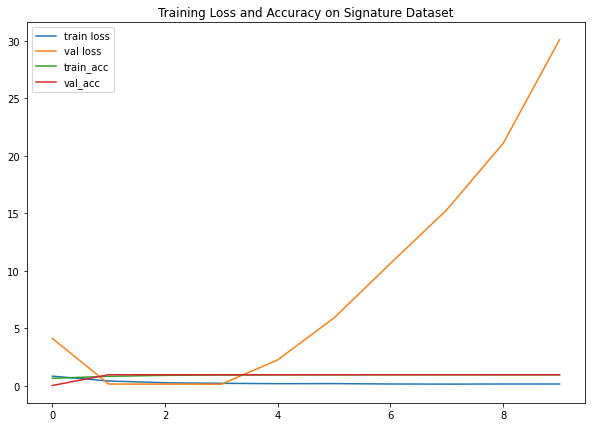

<Figure size 432x288 with 0 Axes>

In [11]:
plt.figure(figsize=(10,7))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title("Training Loss and Accuracy on Signature Dataset")
plt.legend()
plt.show()
plt.savefig('lossval_loss2')

In [12]:
from tensorflow.keras.models import load_model

model.save('forge_real_signature_model_FINAL.h5')